In [1]:
import pandas as pd
import snscrape.modules.twitter as sn
from textblob import TextBlob
import neattext
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo # Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio # Plotly renderer
from plotly.subplots import make_subplots #to make more than one plot in Plotly
import numpy as np
from transformers import pipeline
from neattext.pipeline import TextPipeline
import neattext.functions as nfx
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

c:\Users\BIOLA\Desktop\Data Science Projects\Learnings\Twitter Analysis\twitter_env3.8\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### Data Mining

In [103]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = '((#SayNoToRape)) lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

Say_no_to_rape = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [3]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'rape culture lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

rape_culture2 = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [4]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = '(rape_culture) (#rape_culture) lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

df = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [5]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'call to action rape lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

call_to_action = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [6]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'Self Defense Suggestion rape lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

self_defence = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [7]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'Victim Blaming rape lang:en lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

victim_blaming = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [8]:
# query =  'rapist (#rape OR #assualt OR #abuse OR #rapist OR #sexual_assualt OR #sexual_abuse) lang:en) until:2022-04-30'
query = 'Rape Penalty lang:en lang:en'

tweet_words = []
limit = 4000
for tweet in sn.TwitterSearchScraper(query).get_items():
    if len(tweet_words) == limit:
        break
    else:
        tweet_words.append([tweet.date, tweet.user.displayname, 
            tweet.content, tweet.lang, tweet.source])

rape_penalty = pd.DataFrame(tweet_words, columns=['Date', 'DisplayName', 'Tweets', 'Language', 'location'])



In [95]:
rape_culture2_ = rape_culture2.copy()
rape_penalty_  = rape_penalty.copy()
victim_blaming_ = victim_blaming.copy()
self_defence_   = self_defence.copy()
call_to_action_ = call_to_action.copy()
Say_no_to_rape_ = Say_no_to_rape.copy()

---------------------------------------------------------
### Data Cleaning

In [4]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
rape_culture2_['clean_tweet'] = rape_culture2_['Tweets'].apply(cleaner)
rape_culture2_['clean_tweet'] = rape_culture2_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
rape_culture2_['clean_tweet'] = rape_culture2_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
rape_culture2_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
rape_culture2_.reset_index(drop = True)
rape_culture2_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
rape_culture2_.Date = rape_culture2_.Date.str[:9] # Select the first 9 letters of the strings
rape_culture2_.set_index('Date', inplace= True)
rape_culture2_['DisplayName'] = rape_culture2_['DisplayName'].apply(nfx.remove_emojis)
rape_culture2_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

rape_culture2_.shape

KeyError: 'Tweets'

In [ ]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
rape_penalty_['clean_tweet'] = rape_penalty_['Tweets'].apply(cleaner)
rape_penalty_['clean_tweet'] = rape_penalty_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
rape_penalty_['clean_tweet'] = rape_penalty_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
rape_penalty_['clean_tweet'] = rape_penalty_['clean_tweet'].apply(nfx.remove_emojis)
rape_penalty_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
rape_penalty_.reset_index(drop = True)
rape_penalty_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
rape_penalty_.Date = rape_penalty_.Date.str[:9] # Select the first 9 letters of the strings
rape_penalty_.set_index('Date', inplace= True)
rape_penalty_['DisplayName'] = rape_penalty_['DisplayName'].apply(nfx.remove_emojis)
rape_penalty_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

rape_penalty_

,DisplayName,clean_tweet
Date,,
2022-07-2,jude 🦴hell detective (DOLL),cw: sa the thing about sexual violence in fant...
2022-07-2,Rachel (is Awake) Horton,Let’s try to stop the euphemisms for truly hor...
2022-07-2,Gina Lee she/her DMs,Pedophilia &amp; rape/incest are HEAVY sins....
2022-07-2,OnyekaChi,"Yes, and the girl will also ..."
2022-07-2,angela55,It's also annoying when you can't file...
...,...,...
2022-07-2,I LOVE MILFS,Men who rape women are charged with “att...
2022-07-2,wardy,"18 years ffs, rape of a child should be the ..."
2022-07-2,Cold Dead Fingers,I support the Death Penalty for child rape.


In [ ]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
victim_blaming_['clean_tweet'] = victim_blaming_['Tweets'].apply(cleaner)
victim_blaming_['clean_tweet'] = victim_blaming_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
victim_blaming_['clean_tweet'] = victim_blaming_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
victim_blaming_['clean_tweet'] = victim_blaming_['clean_tweet'].apply(nfx.remove_emojis)
victim_blaming_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
victim_blaming_.reset_index(drop = True)
victim_blaming_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
victim_blaming_.Date = victim_blaming_.Date.str[:9] # Select the first 9 letters of the strings
victim_blaming_.set_index('Date', inplace= True)
victim_blaming_['DisplayName'] = victim_blaming_['DisplayName'].apply(nfx.remove_emojis)
victim_blaming_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

victim_blaming_

,DisplayName,clean_tweet
Date,,
2022-07-2,Krunken Duncan,Saved a potential rape victim and stop a...
2022-07-2,Jay Robertson,"The GOP's ""blame the Capitol Police"" tactics..."
2022-07-2,Thando Ndlovu,That doesn't work in Zim!! This is crazy vic...
2022-07-2,lawrence,That's like blaming the rape victim for no...
2022-07-2,DreamZim,Its sad when it's coming from a person w...
...,...,...
2022-07-2,Bex J,"Quite, question should be how tf did no-one ..."
2022-07-2,King James,They should be apologizing to you for ...
2022-07-2,infinitelinesof7,Rape culture/ victim blaming


In [ ]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
self_defence_['clean_tweet'] = self_defence_['Tweets'].apply(cleaner)
self_defence_['clean_tweet'] = self_defence_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
self_defence_['clean_tweet'] = self_defence_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
self_defence_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
self_defence_.reset_index(drop = True)
self_defence_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
self_defence_.Date = self_defence_.Date.str[:9] # Select the first 9 letters of the strings
self_defence_.set_index('Date', inplace= True)
self_defence_['DisplayName'] = self_defence_['DisplayName'].apply(nfx.remove_emojis)
self_defence_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

self_defence_.shape

(62, 2)

In [5]:
import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
call_to_action_['clean_tweet'] = call_to_action_['Tweets'].apply(cleaner)
call_to_action_['clean_tweet'] = call_to_action_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
call_to_action_['clean_tweet'] = call_to_action_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
call_to_action_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
call_to_action_.reset_index(drop = True)
call_to_action_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
call_to_action_.Date = call_to_action_.Date.str[:9] # Select the first 9 letters of the strings
call_to_action_.set_index('Date', inplace= True)
call_to_action_['DisplayName'] = call_to_action_['DisplayName'].apply(nfx.remove_emojis)
call_to_action_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

call_to_action_.shape

KeyError: 'Tweets'

In [105]:

import re
def cleaner(txt):
    txt = re.sub('#rape', 'rape', txt)
    txt = re.sub('#Rape', 'Rape', txt)
    txt = re.sub('#[A-Za-z0-9]+', '', txt)
    txt = re.sub('\\n', '', txt)
    txt = re.sub('https?:\/\/\S+', '', txt)
    txt = re.sub('!Rape', 'Rape', txt)
    return txt
    
Say_no_to_rape_['clean_tweet'] = Say_no_to_rape_['Tweets'].apply(cleaner)
Say_no_to_rape_['clean_tweet'] = Say_no_to_rape_['clean_tweet'].apply(nfx.remove_userhandles, nfx.remove_puncts)
Say_no_to_rape_['clean_tweet'] = Say_no_to_rape_['clean_tweet'].apply(nfx.remove_dates, nfx.remove_special_characters)
Say_no_to_rape_.drop(['Language', 'location', 'Tweets'], axis = 1, inplace = True)
Say_no_to_rape_.reset_index(drop = True)
Say_no_to_rape_['Date'] = datetime.today().strftime('%Y-%m-%d') # Convert date column to Datetime and set it to index
Say_no_to_rape_.Date = Say_no_to_rape_.Date.str[:9] # Select the first 9 letters of the strings
Say_no_to_rape_.set_index('Date', inplace= True)
Say_no_to_rape_['DisplayName'] = Say_no_to_rape_['DisplayName'].apply(nfx.remove_emojis)
Say_no_to_rape_.drop_duplicates(subset = 'clean_tweet', keep = 'first', inplace = True)

Say_no_to_rape_.shape

(3811, 2)

-------------------------------------------------------------------------
### Building Sentiment

In [96]:
from textblob import TextBlob
# def Get_Sentiment(text):
#     blob = TextBlob(text)
#     polarity = blob.sentiment.polarity
#     subjectivity = blob.sentiment.subjectivity
#     if polarity >0:
#         label = 'Positive'
#     elif polarity <0:
#         label = 'Negative'
#     else:
#         label = 'Neutral'
#     result = {'Polarity': polarity, 'Subjectivity': subjectivity, 'Sentiment': label}
#     return result


    # Create Sentiment Function
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity


# Create a function to store the sentiment output

def sentiment_score(score):
    if score < 0.0: #..................................... items that falls below 0.4
        return 'Negetive'
    elif score == 0.0: #.................. items that are between 0.4 and 0.55
        return 'Neutral'
    else:
        return 'Positive' # ............................... items that falls above 0.55

In [97]:
# Create columns for each subject and each dataframes
rape_culture2_['Subjectivity'] = rape_culture2_['clean_tweet'].apply(get_subjectivity)
rape_culture2_['Polarity'] = rape_culture2_['clean_tweet'].apply(get_polarity)

rape_penalty_['Subjectivity'] = rape_penalty_['clean_tweet'].apply(get_subjectivity)
rape_penalty_['Polarity'] = rape_penalty_['clean_tweet'].apply(get_polarity)

victim_blaming_['Subjectivity'] = victim_blaming_['clean_tweet'].apply(get_subjectivity)
victim_blaming_['Polarity'] = victim_blaming_['clean_tweet'].apply(get_polarity)

self_defence_['Subjectivity'] = self_defence_['clean_tweet'].apply(get_subjectivity)
self_defence_['Polarity'] = self_defence_['clean_tweet'].apply(get_polarity)

call_to_action_['Subjectivity'] = call_to_action_['clean_tweet'].apply(get_subjectivity)
call_to_action_['Polarity'] = call_to_action_['clean_tweet'].apply(get_polarity)


Say_no_to_rape_['Subjectivity'] = Say_no_to_rape_['clean_tweet'].apply(get_subjectivity)
Say_no_to_rape_['Polarity'] = Say_no_to_rape_['clean_tweet'].apply(get_polarity)

In [53]:
# Getting the sentiment degree cannot work on a duplicated index. We reset index 
rape_culture2_.reset_index(inplace= True)
rape_penalty_.reset_index(inplace= True)
victim_blaming_.reset_index(inplace= True)
self_defence_.reset_index(inplace= True)
call_to_action_.reset_index(inplace= True)
Say_no_to_rape_.reset_index(inplace= True)

In [98]:
# Create a column to store the sentiment degree in all data frames
rape_culture2_['Sentiments'] = rape_culture2_['Polarity'].apply(sentiment_score)
rape_penalty_['Sentiments'] = rape_penalty_['Polarity'].apply(sentiment_score)
victim_blaming_['Sentiments'] = victim_blaming_['Polarity'].apply(sentiment_score)
self_defence_['Sentiments'] = self_defence_['Polarity'].apply(sentiment_score)
call_to_action_['Sentiments'] = call_to_action_['Polarity'].apply(sentiment_score)
Say_no_to_rape_['Sentiments'] = Say_no_to_rape_['Polarity'].apply(sentiment_score)

In [106]:
# Save datasets to CSV
rape_culture2_.to_csv('Rape Culture.csv')
rape_penalty_.to_csv('Rape Penalty.csv')
victim_blaming_.to_csv('Victim Blaming.csv')
self_defence_.to_csv('Self Defence.csv')
call_to_action_.to_csv('Call to Action.csv')
Say_no_to_rape_.to_csv('Say No To Rape.csv')

Display all datasets

In [108]:
rape_culture2_.drop(['Unnamed: 0'], axis = 1, inplace = True)
Say_no_to_rape_.drop(['Unnamed: 0'], axis = 1, inplace = True)
rape_penalty_.drop(['Unnamed: 0'], axis = 1, inplace = True)
victim_blaming_.drop(['Unnamed: 0'], axis = 1, inplace = True)
self_defence_.drop(['Unnamed: 0'], axis = 1, inplace = True)
call_to_action_.drop(['Unnamed: 0'], axis = 1, inplace = True)

# Display each of the datasets
import jinja2 #...................This helps us to give the table titles

display(rape_culture2_.head(5).style.set_caption("RAPE CULTURE"))
display(rape_penalty_.head(5).style.set_caption("RAPE PENALTY"))
display(victim_blaming_.head(5).style.set_caption("VICTIM BLAMING"))
display(self_defence_.head(5).style.set_caption("SELF DEFENCE"))
display(call_to_action_.head(5).style.set_caption("CALL TO ACTION"))
display(Say_no_to_rape_.head(5).style.set_caption("SAY NO TO RAPE"))

,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments
0,2022-07-2,Benjamin Ady,It's been 9 days since published/promoted a talk by unrepentant sexual predator Ravi Zacharias from SBC 18. They continue to refuse to take it down. RapeCulture,0.561111,0.172222,Positive
1,2022-07-2,ayussy,"my brother in christ as times move forward we need to get rid of toxic and bullshit cultures. in india rape culture is a thing, pretty normal in rural areas. the backbone IS sexism. would you like to brush that off too? it all starts when you’re young",0.512500,0.125000,Positive
2,2022-07-2,MyVintageHockey,"Hockey culture has been promoting rape culture by hiding so many sexual assault situations throughout its history, it is time for change",0.666667,0.500000,Positive
3,2022-07-2,BlackedHatGuy,"For White Women, protecting White supremacy was more a priority than standing for women's rights. So while they bemoaned not having certain rights, they remained complicit in silencing Black Women because to call out rape culture would damage their marrying into wealth prospects",0.300952,0.109524,Positive
4,2022-07-2,Truth seeker,Unfortunately this cancer did spread to regional movies as well. Incredibly sick culture that dominated 80s and 90s. Then you wonder why there's a rape culture.,0.928571,-0.607143,Negetive


,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments
0,2022-07-2,jude 🦴hell detective (DOLL),"cw: sa the thing about sexual violence in fantasy novels is that it ignores so many factors like...for example vikings had a pretty strict penalty for rape (within their society) and it wasn't even tied to ""women are property and rape makes them damaged goods""",0.777778,0.416667,Positive
1,2022-07-2,Rachel (is Awake) Horton,Let’s try to stop the euphemisms for truly horrific acts.Sexual attraction to animals? Animal rape.Sexual attraction to children? Child rape.Fantasizing about eating fellow human beings? Psychotic and a candidate for the death penalty - NOT a Julia Childs cooking show.,0.700000,-0.500000,Negetive
2,2022-07-2,Gina Lee she/her DMs,Pedophilia & rape/incest are HEAVY sins. Especially if they commit murder in the process.They should most definitely be given a life sentence and/or the dəatн penalty for them.No qualms about it.They're sick in the head to commit these atrocious acts.Fkи disgusting.,0.765306,-0.302041,Negetive
3,2022-07-2,OnyekaChi,"Yes, and the girl will also be blamed because there is a penalty for rape, which means the crime is real and made to be committed by humans not animals Lolz.",0.300000,0.200000,Positive
4,2022-07-2,angela55,"It's also annoying when you can't file that baby in the stomach as a dependent, or letting a father rape his young daughter and give birth, are they really children. These repugs will say they are for the death penalty, isn't that a life??",0.500000,-0.166667,Negetive


,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments
0,2022-07-2,Krunken Duncan,"Saved a potential rape victim and stop a dude with a six in blade cause I’m a coward I guess.Also I’m not killing kids, I agree the idiots that go to gun free zones to kill are cowards and horrible people, but blaming me is a stretch.",0.730000,-0.295000,Negetive
1,2022-07-2,Jay Robertson,"The GOP's ""blame the Capitol Police"" tactics pretty much amounts to blaming a rape victim for wearing *that* skirt"".",0.416667,0.125000,Positive
2,2022-07-2,Thando Ndlovu,That doesn't work in Zim!! This is crazy victim blaming!! Do you also want us to prove that Judith Todd's rape was real too!?,0.416667,-0.155729,Negetive
3,2022-07-2,lawrence,"That's like blaming the rape victim for not fighting back hard enough. Ahhh. But that IS what you guys do, right? Trump lost. You've been conned. Stop sending him your money. Remove the red hat and let in some fresh air. TURN OFF FOX NEWS.",0.303912,0.031293,Positive
4,2022-07-2,DreamZim,Its sad when it's coming from a person who says was a victim of rape. You can't judge Susan based on what happend after she was psychologically traumatised at 16. Instead of seeing her sleeping with all the other men as q condition caused by a traumatic past you go blaming her.,0.355000,-0.190000,Negetive


,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments
0,2022-07-2,Susan Jane Allen ‍,"Great self defense tool. Every woman should have one. Once employed against an attacker, it would certainly be a no brainer for a rape charge. My only suggestion is the barbs should be razor sharp metal! Make it hurt!",0.767857,0.124386,Positive
1,2022-07-2,alexander,Here’s a wild suggestion men need to keep it in their pants and know that no means no or make it legal for women to chop it off in self defense if he tries to rape her.,0.333333,0.066667,Positive
2,2022-07-2,Skye,"She is. Her genius suggestion for fighting GBV: streetlights. Not self-defense, not pressure on govt/saps to do their jobs and prosecute perps (there’s a massive shortage of rape kits, consumables, 200k DNA processing backlog at forensics lab, etc etc).No. Streetlights.",1.000000,0.000000,Neutral
3,2022-07-2,🦋,"Right! Evil comes from all genders so self defense does not only protect against men or rape it’s protects from anyone looking to harm which could stealing, killing, assaulting etc! I just don’t see how the suggestion is offensive.",0.845238,-0.214286,Negetive
4,2022-07-2,🦋,"Stop this from the roof top that will stop them!? I’m a perfect world there wouldn’t be rape, there wouldn’t be stealing, lying, killing etc. but we are NOT in a perfect world so why not get self defense!? Why is that such a damn offensive suggestion!?!?",0.750000,0.656250,Positive


,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments
0,2022-07-2,функціональний математикун,"""No to war"" is not a call to action. It doesn't mean a thing. Russia decided to invade Ukraine. Tens of thousands of russian people rape,kill and humiliate our people. Every our aggressive action is only to prevent destruction. It should've been at least ""no to russian invasion""",0.326786,-0.058929,Negetive
1,2022-07-2,Deniz Rojda Tunç,I think the Greek police means that we are protecting the rapists agains to the call to action for the rape attempts in the region recently! Hundreds of police are waiting for the protesters surrounding the park. you are a misogynist!!,0.116667,0.033333,Positive
2,2022-07-2,Jane Beckwith,I feel like it might be both the 1860s and 1960s...There is certainly a moral call to action to protect fundamental freedoms. I am willing to fight for abortion rights without mentioning any specific child victim of rape though. My choice.,0.255000,0.055000,Positive
3,2022-07-2,Juquan Highsmith (Up/Yours),"Master of the obvious here. Jesus, I am talking about the story, Moses and God. I am saying Moses was when that rule was codified. And words do equal crime, ""a call to action"" is illegal. I say we arrest all rappers, they glorify violence and rape.",0.270000,-0.090000,Negetive
4,2022-07-2,Nicole Amundsen,"Take the National Stage on this. Democrat Leaders like you must fight the insane hypocrisy of the extremist GOP, the one that says 10 year rape victim must bear a child. End this insanity with strong leadership and a call to Action!!! Thank you.",0.470833,-0.111589,Negetive


,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments
0,2022-07-2,First India,"An eight-and-a-half-year-old girl was allegedly raped inside the toilet of a government school in the Khoefiza area of Bhopal by husband of a sweeper employed there, said police on Saturday. RapeCases",0.050000,-0.066667,Negetive
1,2022-07-2,The Global Insider,Govt notifies 26-member anti-rape committee.RapeEmergency Rape,0.000000,0.000000,Neutral
2,2022-07-2,Yungskid,Hello Twitter! Has anything been done to these boys? Please let’s find these boys so justice can be served. So sad to watch💔,1.000000,-0.500000,Negetive
3,2022-07-2,ALex Intelligence,Read my thoughts on YourQuote app at,0.000000,0.000000,Neutral
4,2022-07-2,Akitiolu,Let’s talk about rape; let me bring this back. also stop so the fight won’t be lost.,0.000000,0.000000,Neutral


--------------------------------
### Visualization Of Public Sentiments

3923                Last, I’m not sure if you realize it but you’re being completely biphobic / homophobic. You’re blackmailing people to have sex with people they’re not attracted to. I’m not bullying straight men and calling them homophobic for not wanting me. That’s rape culture.
3924                                                                                                                                   People will deny tooth and nail that pedophile culture and child abuse culture exist even if they accept that rape culture exists. It’s incredible. 
3925                                                Love spanning age gap between consenting adults resulting in unity of marriage = Profanity?. Woke = Alert to social injustice, especially rascism. MeToo = a social movement against sexual abuse, sexual harassment, and rape culture.
3926                                                                                                                                                

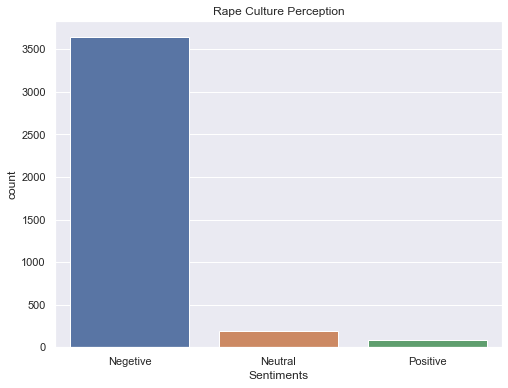

In [62]:
# Visualization on Rape Culture

with pd.option_context('display.max_colwidth', None):
  display(rape_culture2_['clean_tweet'].tail(6))

plt.figure(figsize = (8, 6))
sns.set(style = 'darkgrid')
orders = rape_culture2_['Sentiments'].value_counts(ascending = False).index
sns.countplot(x = rape_culture2_['Sentiments'], order = orders).set(title = 'Rape Culture Perception')
plt.show()

3827                                 Not having consent for sexual relations is illegal, this constitutes rape or sexual assault. Which as you know isn't well prosecuted in court and usually has minimal penalties. See literally all church abuse cases, Brock Turner, Weinstein, etc etc.
3828                                            Men who rape women are charged with “attempt to challenge a woman’s modesty” rather than rape which is light penalty, and since 2021 rape stats (with mostly women victims) have gone up 12%. I can provide some links for you to read up on?
3829                                                                                                                                                                                                                             18 years ffs, rape of a child should be the death penalty !!
3830                                                                                                                                          

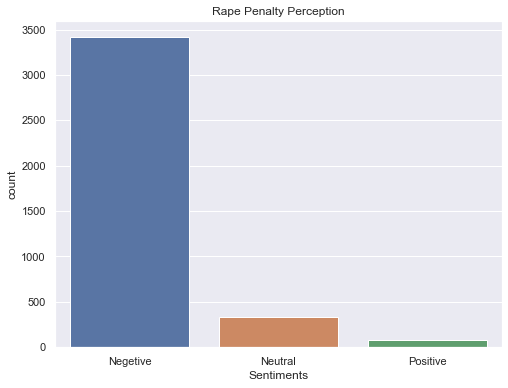

In [65]:
# Visualization on Rape Penalty

with pd.option_context('display.max_colwidth', None):
  display(rape_penalty_['clean_tweet'].tail(6))

plt.figure(figsize = (8, 6))
sns.set(style = 'darkgrid')
orders = rape_penalty_['Sentiments'].value_counts(ascending = False).index
sns.countplot(x = rape_penalty_['Sentiments'], order = orders).set(title = 'Rape Penalty Perception')
plt.show()

3926                                                      babe if a muslim woman WILLINGLY wants to wear a hijab to show her devotion and be modest, what’s the issue?? It is about being devoted to Allah, it definitely is not “rape culture” nor is it “victim blaming”
3927      Quite, question should be how tf did no-one make a noise about this in Dec? I haven't watched it as JC is a racist, ableist, queerphobic, rape joke making pos. Had I, I'd have been making a racket. Sorry they're victim blaming, utter evil oxygen theives. X
3928                                                                              They should be apologizing to you for victim blaming you. People should know that sexual harassment has nothing to do with what you wear or do. That's rape culture and it needs to stop
3929                                                                                                                                                                                                   

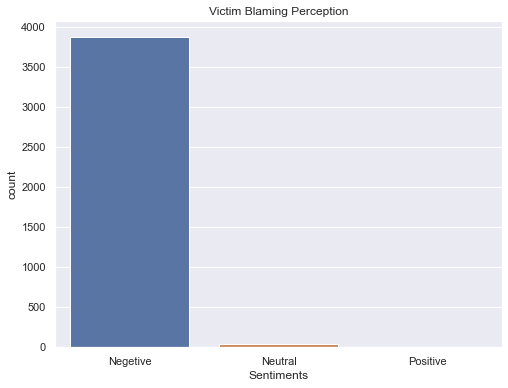

In [66]:
# Visualization on Victim Blaming

with pd.option_context('display.max_colwidth', None):
  display(victim_blaming_['clean_tweet'].tail(6))

plt.figure(figsize = (8, 6))
sns.set(style = 'darkgrid')
orders = victim_blaming_['Sentiments'].value_counts(ascending = False).index
sns.countplot(x = victim_blaming_['Sentiments'], order = orders).set(title = 'Victim Blaming Perception')
plt.show()

56            While it would be nice if men would just "not rape," perhaps it would be prudent to follow 's suggestion that you learn self defense
57                                                  Feminists Freak Out Over Miss Nevada Suggestion Women Learn Self Defense to Avoid Rape  via   
58                            So the suggestion that the best way to prevent rape is to be able-bodied and capable of self-defense really irks me.
59                           A suggestion: Women self defense lessons.In a country with such high rape stats there's no one that offers this in  😕
60                  Amazed at neg responses to   suggestion that reminding/training men not to rape works better then a gun or self defense train.
61    Hannity said that a suggestion to learn jujitsu to defend agains rape is stupid then 2min later women need to learn self defense 4protection
Name: clean_tweet, dtype: object

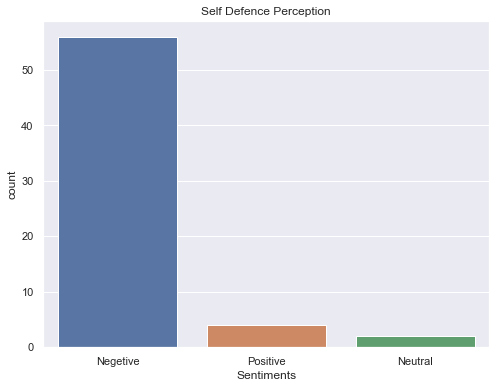

In [67]:
# Visualization on Self Defence

with pd.option_context('display.max_colwidth', None):
  display(self_defence_['clean_tweet'].tail(6))

plt.figure(figsize = (8, 6))
sns.set(style = 'darkgrid')
orders = self_defence_['Sentiments'].value_counts(ascending = False).index
sns.countplot(x = self_defence_['Sentiments'], order = orders).set(title = 'Self Defence Perception')
plt.show()

0    An eight-and-a-half-year-old girl was allegedly raped inside the toilet of a government school in the Khoefiza area of Bhopal by husband of a sweeper employed there, said police on Saturday.       RapeCases 
1                                                                                                                                                 Govt notifies 26-member anti-rape committee.RapeEmergency  Rape   
2                                                                 Hello Twitter! Has anything been done to these boys? Please let’s find these boys so justice can be served. So sad to watch💔                      
3                                                                                                                                                                         Read my thoughts on YourQuote app at      
4                                                                                                                            Let’s talk about rape; 

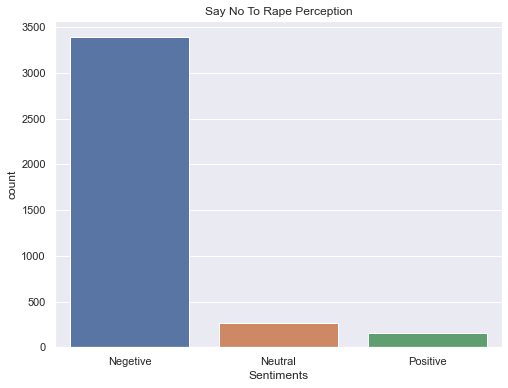

In [70]:
# Visualization on Say No To Rape 

with pd.option_context('display.max_colwidth', None):
  display(Say_no_to_rape_['clean_tweet'].head(6))

plt.figure(figsize = (8, 6))
sns.set(style = 'darkgrid')
orders = Say_no_to_rape_['Sentiments'].value_counts(ascending = False).index
sns.countplot(x = Say_no_to_rape_['Sentiments'], order = orders).set(title = 'Say No To Rape Perception')
plt.show()

26                                                                                                                      Research Series💌| The Gender-Inclusive Rape Myth Acceptance Scale ⑤⑥- Call to Action Check out our article here:   RapeMyth 
27                                                                                                                     Video 73 Intellectual Rape of America!  Call to Action!  Stop The Rape! Share the info!  The American people are waking up!  
28                                                called it a genocide by Russia ! What are we waiting for ? More videos, More stories of rape and torture. If we don’t help now it will soon be on our doorsteps, our streets.. call to Action now!
29    Call to Action- Global Protest 4/2/22 Enemies of the Tigray ppl are continuing their genocidal acts in unconscionable ways. man-made starvation, extrajudicial killings, and rape are not enough; now they are burning Tigrayans alive. ❤️💛   
30                  

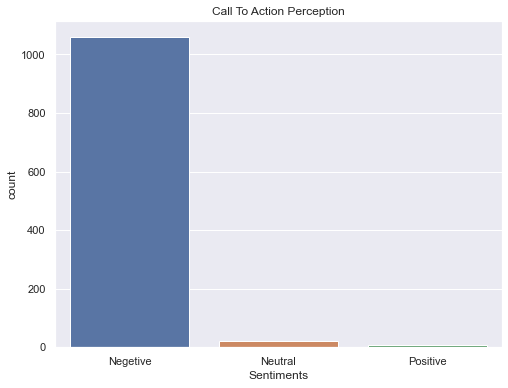

In [74]:
# Visualization on Call To Action

with pd.option_context('display.max_colwidth', None):
  display(call_to_action_['clean_tweet'].iloc[26:32])

plt.figure(figsize = (8, 6))
sns.set(style = 'darkgrid')
orders = call_to_action_['Sentiments'].value_counts(ascending = False).index
sns.countplot(x = call_to_action_['Sentiments'], order = orders).set(title = 'Call To Action Perception')
plt.show()

- In Summary, we established that there is a general public animosity towards rape and all its occurence based on our sample data. Rape punishement also has a high number of negetive tweets by twitter users which insights a publics support of consequence for rape occurences.

We will count the most common used words (preferably adjectives) in the entire tweet so to have an idea of the overall polarity of public perception on the subject matter. To do this, we will extract the adjectives (adjectives modifies or describes other words) in each tweet, then use a built in collection module to determine words with highest frequency, we apply sentiment analysis function to determine the polarity, which ultimately drive understanding of general public data perception.

In [199]:
# First, concat the whole of the  dataframes to make one
data_lists = [rape_penalty_, rape_culture2_, victim_blaming_, self_defence_, call_to_action_, Say_no_to_rape_]
tweet_list = pd.concat(data_lists)
tweet_list = tweet_list[['clean_tweet']]
# .........................................

# Using the nltk library, we identiy the adjectives
from nltk import word_tokenize,sent_tokenize
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

tweets = tweet_list.copy()
tweet_list['adj'] = tweet_list['clean_tweet'].apply(getAdjectives)
tweet_list.head()

,clean_tweet,adj
0,cw: sa the thing about sexual violence in fant...,sexual many pretty strict
1,Let’s try to stop the euphemisms for truly hor...,horrific acts.Sexual rape.Sexual fellow human
2,Pedophilia &amp; rape/incest are HEAVY sins....,them.No it.They sick atrocious
3,"Yes, and the girl will also ...",real
4,It's also annoying when you can't file...,young


In [250]:
# Display the top words Using Built-in Python Collections module to determine Word frequency

full_adj = tweet_list['adj'].tolist()
list(map(cleaner, full_adj)) # ................clean the texts
adj_list=[]
for item in full_adj:
    item = item.split()
    for i in item:
        adj_list.append(i) 

from collections import Counter
counts = Counter(adj_list)
cv = pd.DataFrame.from_dict(counts, orient='index').reset_index()
cv.columns = ['Words', 'Count']
cv.sort_values(by='Count', ascending=False, inplace=True)
cv.reset_index(drop = True, inplace = True)
cv.drop([cv.index[1], cv.index[3], cv.index[10]], inplace = True)
cv.reset_index(drop = True, inplace = True)
cv.head(10)

,Words,Count
0,sexual,981
1,other,455
2,victim,378
3,severe,321
4,wrong,264
5,own,249
6,bad,231
7,such,231
8,real,198
9,Rape,190


,Words,Count,Polarity,sentiment
0,sexual,981,0.500,Positive
1,other,455,-0.125,Negetive
2,victim,378,-0.075,Negetive
3,severe,321,0.000,Neutral
4,wrong,264,-0.500,Negetive
5,own,249,0.600,Positive
6,bad,231,-0.700,Negetive
7,such,231,0.000,Neutral
8,real,198,0.200,Positive
9,Rape,190,0.000,Neutral


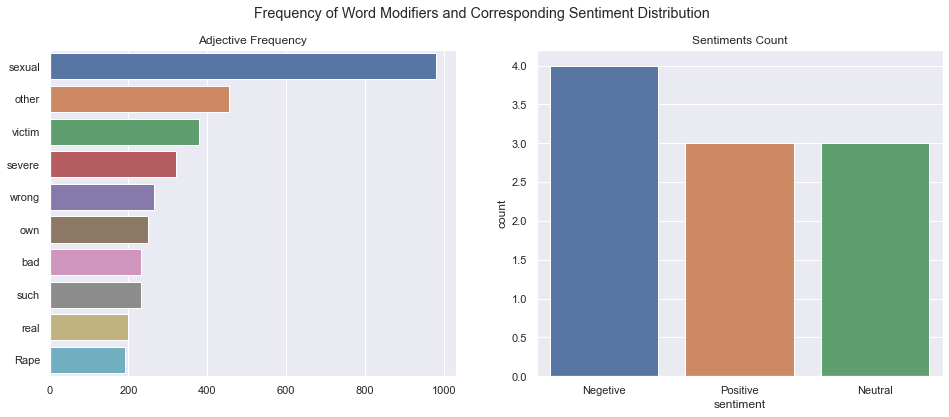

In [295]:
counts = cv.head(10) # ................. Instantiate the frame for charting
xs = counts['Count'].head(10).to_list()
ys = counts['Words'].head(10).to_list()

# create polarity for building of sentiments
counts['Polarity'] = counts['Words'].apply(get_polarity)
counts['sentiment'] = counts['Polarity'].apply(sentiment_score)
display(counts)

# subplot visualization of most used adjectives and their corresponding sentiments
sns.set(style = 'darkgrid')
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Frequency of Word Modifiers and Corresponding Sentiment Distribution')
sns.barplot(counts, x = xs, y = ys, ax = axes[0]).set(title = 'Adjective Frequency')
orders = counts['sentiment'].value_counts(ascending = False).index
sns.countplot(x = counts['sentiment'],ax = axes[1], order = orders).set(title = 'Sentiments Count')
plt.show()

The visualization to the right display the most used qualifying word in the public perception <br>
The visualization to the left displays the sentiment of the most used qualifying word. This explains that the public mostly has a negetive perception to rape and its areas of discuss. 

-------------------------------------------------------
### Text Classification Modelling for Topic Detection

In [87]:
# prepare the dataset to be used for text analysis modelling
rape_culture2_['Target'] = 'Rape Culture'
rape_penalty_['Target'] = 'Rape penalty'
victim_blaming_['Target'] = 'Victim Blaming'
self_defence_['Target'] = 'Self Defence'
call_to_action_['Target'] = 'Call to Action'

# join the dataframes together
data_list = [rape_penalty_, rape_culture2_, victim_blaming_, self_defence_, call_to_action_]
data = pd.concat(data_list)
data.shape

(12845, 7)

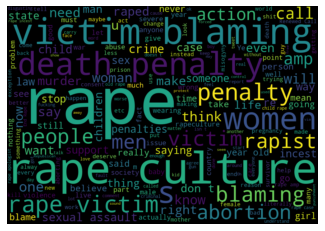

In [424]:
# Display most common words in the dataframe
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

words = ' '.join( [tweet for tweet in data['clean_tweet']])
wordcloud = WordCloud(width = 1000, height = 700).generate(words)
plt.imshow(wordcloud, interpolation  = 'bilinear')
plt.axis('off')
plt.show()

In [394]:
data

,Date,DisplayName,clean_tweet,Subjectivity,Polarity,Sentiments,Target
0,2022-07-2,jude 🦴hell detective (DOLL),cw: sa the thing about sexual violence in fant...,0.777778,0.416667,Positive,Rape penalty
1,2022-07-2,Rachel (is Awake) Horton,Let’s try to stop the euphemisms for truly hor...,0.700000,-0.500000,Positive,Rape penalty
2,2022-07-2,Gina Lee she/her DMs,Pedophilia &amp; rape/incest are HEAVY sins....,0.765306,-0.302041,Positive,Rape penalty
3,2022-07-2,OnyekaChi,"Yes, and the girl will also ...",0.300000,0.200000,Positive,Rape penalty
4,2022-07-2,angela55,It's also annoying when you can't file...,0.500000,-0.166667,Negetive,Rape penalty
...,...,...,...,...,...,...,...
1084,2022-07-2,Shoaib Taimur,"RT Call to Action: Kidnapping, torture, murd...",0.100000,0.100000,Neutral,Call to Action
1085,2022-07-2,sexgenderbody,New post by arvan at | Call to Action: Kidnap...,0.277273,0.118182,Neutral,Call to Action
1086,2022-07-2,CSTS - Serenity,Good news: Victory in Zambian civil case of sc...,0.566667,0.016667,Positive,Call to Action
1087,2022-07-2,WBAL-TV 11 Baltimore,NAACP Joins Rape Investigation Effort: There i...,0.466667,0.300000,Neutral,Call to Action


In [395]:
# Drop unwanted columns and turn all value to lowercase for easy NLP

dx = data.drop(['Subjectivity', 'Polarity', 'Sentiments'],axis = 1)
dx['clean_tweet'] = dx['clean_tweet'].apply(str) # Convert all to string
dx['clean_tweet'] = dx['clean_tweet'].str.lower()

dx['Target'] = dx['Target'].apply(str) # Convert all to string
dx['Target'] = dx['Target'].str.lower()
dx

,Date,DisplayName,clean_tweet,Target
0,2022-07-2,jude 🦴hell detective (DOLL),cw: sa the thing about sexual violence in fant...,rape penalty
1,2022-07-2,Rachel (is Awake) Horton,let’s try to stop the euphemisms for truly hor...,rape penalty
2,2022-07-2,Gina Lee she/her DMs,pedophilia &amp; rape/incest are heavy sins....,rape penalty
3,2022-07-2,OnyekaChi,"yes, and the girl will also ...",rape penalty
4,2022-07-2,angela55,it's also annoying when you can't file...,rape penalty
...,...,...,...,...
1084,2022-07-2,Shoaib Taimur,"rt call to action: kidnapping, torture, murd...",call to action
1085,2022-07-2,sexgenderbody,new post by arvan at | call to action: kidnap...,call to action
1086,2022-07-2,CSTS - Serenity,good news: victory in zambian civil case of sc...,call to action
1087,2022-07-2,WBAL-TV 11 Baltimore,naacp joins rape investigation effort: there i...,call to action


In [396]:
train, test = train_test_split(dx, test_size= 0.2, random_state = 23)
print(f'train size: ', train.shape)
print(f'test size: ', test.shape)

train size:  (10276, 4)
test size:  (2569, 4)


In [397]:
# Joining all the sentences in the train dataframe together

ds = []
for row in range(0,len(train.index)):
    ds.append(' '.join(str(x) for x in train.iloc[row, 2:3]))

# Display the data
ds[1:5]

['  when a black woman was fired from uj for "racism" &amp; "sexism" you were silent. but you are out here protecting rape culture with macg. y\'all token hires have done the same damage as the apartheid regime 🤷🏿\u200d♀️',
 'nailed it   - also   to businesswomen at corporations around the world:“if your company moves to la., be prepared for 2nd class citizenship. you’ll lose control over your body, health care, and live in a rape culture. we’re 100% regressive &amp; proud of it!” ',
 '      1 out of 14-17 males bred in the ancient times. which makes everyone baffled: how did russians, statistically savaage, yet with small stature &amp; penis length, flourish? explains their rape culture. survival of the shittiest',
 '  ronaldo missed rashfords penalty in the euros killing his confidence then benched him for elanga, he arrested greenwood for rape, injured cavani and while still at juve he somehow killed martial\'s  mojo"it\'s not a coincidence..."simple minds are attracted to simple an

In [398]:
# After preparation of our dataset, nextup we countVectorize to put them into binaries of 1s and 0s.
# This auto ascribes a particular number to a letter
# While ngram takes the letters in pairs and ascribes a number to them

# Implement Bag of Words
vector = TfidfVectorizer()
train_set = vector.fit_transform(ds) # This ascribes count to a particular letter

train_set.shape

(10276, 16985)

In [399]:
# perfrom same preprocessing step for Test data

# Join all the test dataframe together
dss = []
for row in range(0,len(test.index)):
    dss.append(' '.join(str(x) for x in test.iloc[row, 2:3]))

# Display the data
dss[1:5]

["    if all aborted babies were conceived through rape and incest then it's time for stiffer penalties on rape and incest",
 '  the baby is innocent. prosecute the man to the fullest extent of the law (i would support the death penalty for rape) and protect the innocent parties. adoption is a great option. also rape is the reason for less than 1% or abortions. in 99+/100 cases, the woman chose.',
 "        and you answer your question, i don't think there's any biological element to how violent or aggressive a person is. that's a symptom of toxic masculinity, and rape culture. our patriarchal society is the problem. there's no biological evidence for the ability to commit crime.",
 'is there a  argument out there that doesn’t involve gun laws, rape and incest, death penalty of murderers, or stating how religion is bad?  an actual reason why abortion should be legal in cases that don’t involve rape/incest, or when the mothers life is in danger. 1/2']

In [400]:
# fit the count on the data
test_set = vector.transform(dss) # Fit transform on 'ds' version of test data  - dss
test_set.shape


(2569, 16985)

In [401]:
# Train using the RandomForest and the MultinomialNB models respectively

rf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf.fit(train_set, train['Target'])


nv =  MultinomialNB()
nv.fit(train_set, train['Target'])


MultinomialNB()

In [402]:
rf_pred = rf.predict(test_set)
nv_pred = nv.predict(test_set)

In [403]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


classify = classification_report(test['Target'], rf_pred )
print(classify)
score = accuracy_score(test['Target'], rf_pred )
print(f'accuracy score: ',score)

                precision    recall  f1-score   support

call to action       1.00      0.99      0.99       221
  rape culture       0.98      0.98      0.98       747
  rape penalty       1.00      0.99      0.99       801
  self defence       1.00      0.64      0.78        11
victim blaming       0.98      0.99      0.98       789

      accuracy                           0.98      2569
     macro avg       0.99      0.92      0.94      2569
  weighted avg       0.98      0.98      0.98      2569

accuracy score:  0.9844297391981316


----------------------------------------------
### Model Testing

In [415]:
data.iloc[2000:2002, 2].values

array(['  We need to make the penalties for rape much higher. The death penalty would be fine with me, but, castration might even be better.',
       '  Bro zubair delted fb id for numerous insulting religion  but u are silent watching  rape threat death penalty for quoting Islamic text  now u also want freedom to insult Hinduism  than u cry why bjp is winning  do u think public  are idiot  ya u are only know how to manpulted ?'],
      dtype=object)

In [418]:
# Testing model 
word = data.iloc[2000:2001, 2].values
count_word = vector.transform(word)
preds = nv.predict(count_word)
preds

array(['rape penalty'], dtype='<U14')

In [422]:
data.iloc[1084:1085, 2].values

array(['  The penalty for rape should be death, public execution preferably. Give a year in jail to attempt to prove their innocence, then day 366 after conviction they are put to death by the state.'],
      dtype=object)

In [420]:
word = data.iloc[1084:1085, 2].values
count_word = vector.transform(word)
preds = nv.predict(count_word)
preds

array(['rape penalty'], dtype='<U14')

THANK YOU